In [2]:
pip install pandas numpy scikit-learn xgboost

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('hhs_disparities_super_extended_target.csv')  # replace with actual path

# Display basic info
print(df.head())

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('Target', axis=1)  # Drop the 'Target' column as it's the label
y = df_encoded['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (scale the numeric features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier (Random Forest example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


  AgeRange  Gender      Race     Ethnicity  EducationLevel EmploymentStatus  \
0    45-54  Female     Black  Non-Hispanic    Some College            Other   
1    55-64    Male  Hispanic      Hispanic      Bachelor's          Retired   
2    35-44  Female     Black  Non-Hispanic     High School       Unemployed   
3    55-64  Female     Other      Hispanic        Doctoral          Retired   
4    55-64    Male     Other      Hispanic  No High School            Other   

  InsuranceType ChronicConditions              AccessBarrier  IncomeLevel  \
0     Uninsured       1 Condition  Cultural/Language Barrier       112705   
1        Public     2+ Conditions                        NaN        20595   
2     Uninsured       1 Condition                        NaN        49592   
3       Private     2+ Conditions                        NaN        60643   
4     Uninsured     2+ Conditions  Cultural/Language Barrier        82665   

  HealthStatus  Target  
0         Fair       1  
1    Excelle

In [6]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [7]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [8]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [9]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='binary'))  # change to 'macro' if multiclass
    print("Recall:", recall_score(y_true, y_pred, average='binary'))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Logistic Regression Evaluation:
Accuracy: 0.805
Precision: 0.8545454545454545
Recall: 0.9038461538461539

SVM Evaluation:
Accuracy: 0.78
Precision: 0.7828282828282829
Recall: 0.9935897435897436

XGBoost Evaluation:
Accuracy: 0.755
Precision: 0.8057142857142857
Recall: 0.9038461538461539


In [10]:
from sklearn.metrics import f1_score
print(f"Logistic Regression F1: {f1_score(y_test, y_pred_lr)}")
print(f"SVM F1: {f1_score(y_test, y_pred_svm)}")
print(f"XGBoost F1: {f1_score(y_test, y_pred_xgb)}")

Logistic Regression F1: 0.8785046728971962
SVM F1: 0.8757062146892656
XGBoost F1: 0.851963746223565


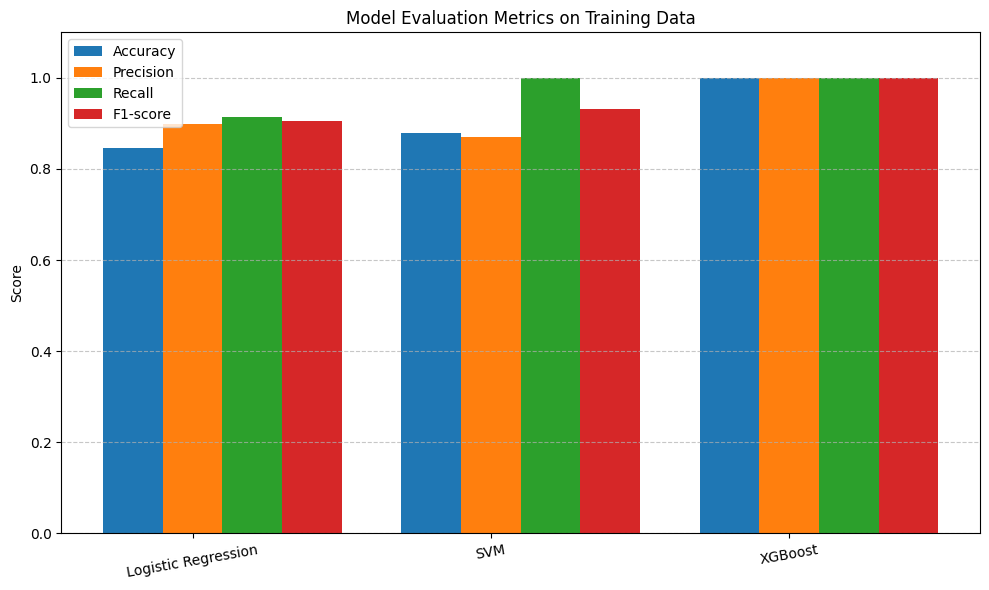

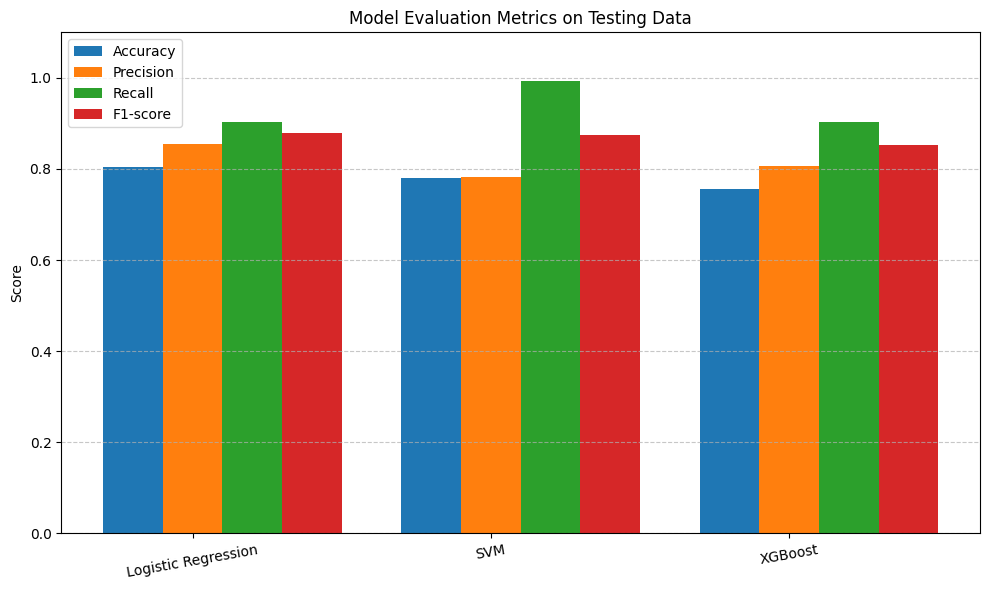

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Get predictions on training set for each model
y_pred_lr_train = lr.predict(X_train)
y_pred_svm_train = svm.predict(X_train)
y_pred_xgb_train = xgb.predict(X_train)

# Define metric function
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

# Gather metrics for train and test
metrics_train = {
    'Logistic Regression': get_metrics(y_train, y_pred_lr_train),
    'SVM': get_metrics(y_train, y_pred_svm_train),
    'XGBoost': get_metrics(y_train, y_pred_xgb_train)
}

metrics_test = {
    'Logistic Regression': get_metrics(y_test, y_pred_lr),
    'SVM': get_metrics(y_test, y_pred_svm),
    'XGBoost': get_metrics(y_test, y_pred_xgb)
}

# Plotting function
def plot_metrics(metrics_dict, title):
    labels = list(metrics_dict.keys())
    metrics = list(next(iter(metrics_dict.values())).keys())

    x = np.arange(len(labels))  # label locations
    width = 0.2  # width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, metric in enumerate(metrics):
        values = [metrics_dict[model][metric] for model in labels]
        ax.bar(x + i * width, values, width, label=metric)

    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1.1)
    ax.legend()
    plt.xticks(rotation=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot train metrics
plot_metrics(metrics_train, 'Model Evaluation Metrics on Training Data')

# Plot test metrics
plot_metrics(metrics_test, 'Model Evaluation Metrics on Testing Data')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:49:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


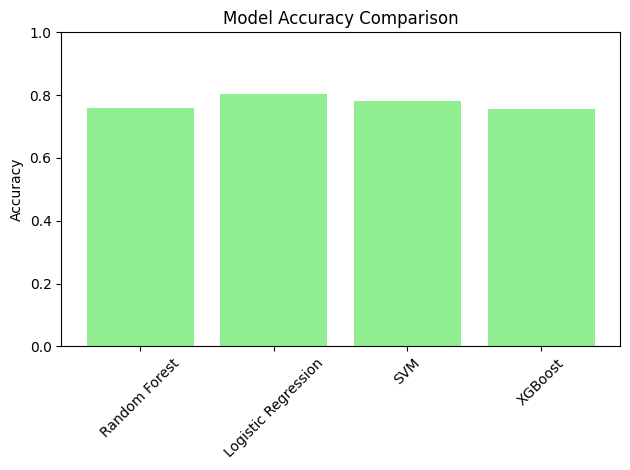

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('hhs_disparities_super_extended_target.csv')  # change if needed

# Preprocessing
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and evaluate models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

accuracies = []
names = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    names.append(name)

# Plot
plt.bar(names, accuracies, color='lightgreen')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
